# Try to use a polynomial regression with the dataset but this time with degree three (cubic). Does it result in better accuracy?

the result of previous try was around 76 lets see if we use x*3 instead to get a better result

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.metrics import r2_score


In [2]:
!wget -nc -O FuelConsumption.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv


File ‘FuelConsumption.csv’ already there; not retrieving.


In [3]:
df = pd.read_csv("FuelConsumption.csv")
cdf = df[['ENGINESIZE', 'CO2EMISSIONS']]
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In [4]:
x_train = np.asanyarray(train[['ENGINESIZE']])
y_train = np.asanyarray(train[['CO2EMISSIONS']])

x_test = np.asanyarray(test[['ENGINESIZE']])
y_test = np.asanyarray(test[['CO2EMISSIONS']])


poly = PolynomialFeatures(degree=3)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.fit_transform(x_test)


cubic_model = linear_model.LinearRegression()

y_train_ = cubic_model.fit(x_train_poly, y_train)

lets draw the model:


Text(0, 0.5, 'Emission')

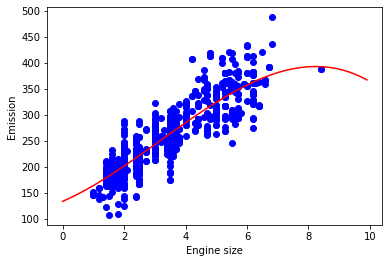

In [9]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = cubic_model.intercept_[0]+ cubic_model.coef_[0][1]*XX+ cubic_model.coef_[0][2]*np.power(XX, 2) + cubic_model.coef_[0][3]*np.power(XX, 3)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")

### time to validate:

In [6]:

y_test_ = cubic_model.predict(x_test_poly)
 

score = r2_score(y_test_, y_test)
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_test_ - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_test_ - y_test) ** 2))
print("R2-score: %.2f" % r2_score(y_test, y_test_ ) )

Mean absolute error: 22.78
Residual sum of squares (MSE): 927.21
R2-score: 0.72


apparently the previous model was better ! ! !  
## to sum up every thing:


Coefficients:  [[ 0.         25.62339773  5.24519762 -0.55060227]]
Intercept:  [134.03878769]
Mean absolute error: 22.78
Residual sum of squares (MSE): 927.21
R2-score: 0.72


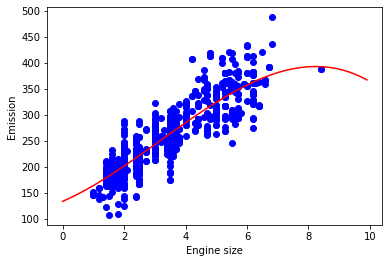

In [10]:
poly3 = PolynomialFeatures(degree=3)
train_x_poly3 = poly3.fit_transform(x_train)
clf3 = linear_model.LinearRegression()
train_y3_ = clf3.fit(train_x_poly3, y_train)

# The coefficients
print ('Coefficients: ', clf3.coef_)
print ('Intercept: ',clf3.intercept_)
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf3.intercept_[0]+ clf3.coef_[0][1]*XX + clf3.coef_[0][2]*np.power(XX, 2) + clf3.coef_[0][3]*np.power(XX, 3)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")
test_x_poly3 = poly3.fit_transform(x_test)
test_y3_ = clf3.predict(test_x_poly3)
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y3_ - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y3_ - y_test) ** 2))
print("R2-score: %.2f" % r2_score(y_test,test_y3_ ) )